## Pima Indians Diabetes data which was collected and made available by "National institute of Diabetes, Digestive and Kidney Diseases"

In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
diabetes = pd.read_csv('diabetes.csv')

# What can we do with this dataset? 

We can develop a model where by asking few questions we can predict the probability of the patient being diagonised for Diabetes. 

In [5]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,NaN,33.6,0.627,999,1
1,1,85.0,66,29,NaN,26.6,0.351,31,0
2,8,183.0,64,0,NaN,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


### The following features have been provided to help us predict whether a person is diabetic or not:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

# Check what data quality issues do we have in the dataset

### Check for Type and Format

Let us check if all our data is correctly formatted

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    object 
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   233 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 54.1+ KB


In [7]:
diabetes['Pregnancies'].value_counts()

1      134
0      111
2      103
3       75
4       68
5       57
6       50
7       44
8       38
9       28
10      22
11      11
13      10
12       9
14       2
10?      2
17       1
7?       1
1?       1
15       1
Name: Pregnancies, dtype: int64

In [8]:
diabetes['Pregnancies'] = diabetes['Pregnancies'].str.replace('?', '')

In [9]:
diabetes['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: Pregnancies, dtype: int64

In [10]:
diabetes['Pregnancies'] = pd.to_numeric(diabetes['Pregnancies'])

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   233 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [12]:
## Let us check for some basic statistical details like percentile, mean, std etc. of a data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,768.000000,768.000000,233.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,69.105469,20.536458,155.377682,32.457464,0.471876,36.976562,0.348958
std,3.369578,30.535641,19.355807,15.952218,117.632588,6.924988,0.331329,61.414483,0.476951
min,0.000000,44.000000,0.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,76.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


#### We have problem of missing values in few columns

## Missing Data

In [13]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     535
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
print('% of missing Insulin data: ', round(535/768, 2))

print('% of missing BMI data: ', round(11/768, 2))

print('% of missing BMI data: ', round(5/768, 2))

% of missing Insulin data:  0.7
% of missing BMI data:  0.01
% of missing BMI data:  0.01


In [17]:
# Since 70% of data in Insulin data is missing. Let us delete the column
# Dropping entire column. 

# Remove column 
diabetes.drop(['Insulin'], axis = 1, inplace=True)

In [18]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,33.6,0.627,999,1
1,1,85.0,66,29,26.6,0.351,31,0
2,8,183.0,64,0,23.3,0.672,32,1
3,1,89.0,66,23,28.1,0.167,21,0
4,0,137.0,40,35,43.1,2.288,33,1


In [ ]:
## if we want to do list or row-wise deletion then we can do it as, 

diabetes_listwise = diabetes.dropna(axis=0)
diabetes_listwise.shape

## As we can see that listwise deletion even removed rows where BMI and Glucose values 
## was missing so ended up having less number of records. 

(752, 8)

## Imputation methods

In [19]:
diabetes.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure                0
SkinThickness                0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [20]:
diabetes[diabetes['Glucose'].isnull() == True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48,20,24.7,0.140,22,0
182,1,NaN,74,20,27.7,0.299,21,0
342,1,NaN,68,35,32.0,0.389,22,0
349,5,NaN,80,32,41.0,0.346,37,1
502,6,NaN,68,41,39.0,0.727,41,1


In [21]:
diabetes.loc[75]

Pregnancies                  1.00
Glucose                       NaN
BloodPressure               48.00
SkinThickness               20.00
BMI                         24.70
DiabetesPedigreeFunction     0.14
Age                         22.00
Outcome                      0.00
Name: 75, dtype: float64

In [22]:
### Replace missing values in each column with the mean or median of that column
diabetes_meanfill = diabetes
diabetes_meanfill = diabetes.fillna(diabetes.mean())

In [23]:
diabetes_meanfill.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
diabetes_meanfill.loc[75]

Pregnancies                   1.000000
Glucose                     121.686763
BloodPressure                48.000000
SkinThickness                20.000000
BMI                          24.700000
DiabetesPedigreeFunction      0.140000
Age                          22.000000
Outcome                       0.000000
Name: 75, dtype: float64

In [25]:
diabetes_medianfill = diabetes
diabetes_medianfill = diabetes.fillna(diabetes.median())

In [26]:
diabetes_medianfill.loc[75]

Pregnancies                   1.00
Glucose                     117.00
BloodPressure                48.00
SkinThickness                20.00
BMI                          24.70
DiabetesPedigreeFunction      0.14
Age                          22.00
Outcome                       0.00
Name: 75, dtype: float64

In [28]:
diabetes[diabetes['BMI'].isnull() == True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96,0,NaN,0.232,54,1
49,7,105.0,0,0,NaN,0.305,24,0
60,2,84.0,0,0,NaN,0.304,21,0
81,2,74.0,0,0,NaN,0.102,22,0
145,0,102.0,75,23,NaN,0.572,21,0
371,0,118.0,64,23,NaN,1.731,21,0
426,0,94.0,0,0,NaN,0.256,25,0
494,3,80.0,0,0,NaN,0.174,22,0
522,6,114.0,0,0,NaN,0.189,26,0
684,5,136.0,82,0,NaN,0.640,69,0


In [29]:
diabetes.loc[9]

Pregnancies                   8.000
Glucose                     125.000
BloodPressure                96.000
SkinThickness                 0.000
BMI                             NaN
DiabetesPedigreeFunction      0.232
Age                          54.000
Outcome                       1.000
Name: 9, dtype: float64

In [30]:
diabetes_knn = diabetes

In [31]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 3)
diabetes_knn['BMI'] = knn_imputer.fit_transform(diabetes[['BMI']])

In [32]:
diabetes_knn.loc[9]

Pregnancies                   8.000000
Glucose                     125.000000
BloodPressure                96.000000
SkinThickness                 0.000000
BMI                          32.457464
DiabetesPedigreeFunction      0.232000
Age                          54.000000
Outcome                       1.000000
Name: 9, dtype: float64

In [33]:
diabetes_mice = diabetes

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()
diabetes_mice['BMI']  = mice_imputer.fit_transform(diabetes[['BMI']])

In [35]:
diabetes_mice.loc[9]

Pregnancies                   8.000000
Glucose                     125.000000
BloodPressure                96.000000
SkinThickness                 0.000000
BMI                          32.457464
DiabetesPedigreeFunction      0.232000
Age                          54.000000
Outcome                       1.000000
Name: 9, dtype: float64

## Outliers

In [36]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,69.105469,20.536458,32.457464,0.471876,36.976562,0.348958
std,3.369578,30.535641,19.355807,15.952218,6.875151,0.331329,61.414483,0.476951
min,0.000000,44.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,999.000000,1.000000


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

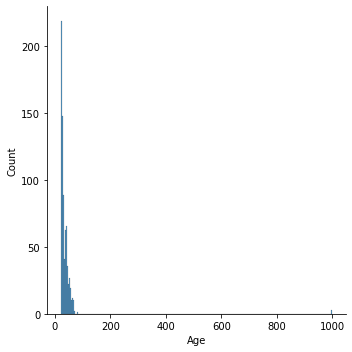

In [38]:
sns.displot(diabetes, x="Age")

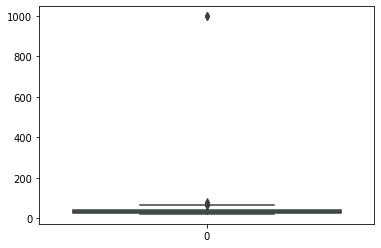

In [39]:
sns.boxplot(data = diabetes['Age'])

In [40]:
diabetes[diabetes['Age'] > 150]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,33.6,0.627,999,1
326,1,122.0,64,32,35.1,0.692,999,1
740,11,120.0,80,37,42.3,0.785,999,1


In [41]:
diabetes.loc[diabetes['Age'] > 150, 'Age'] = (diabetes[diabetes['Age'] < 150])['Age'].max()

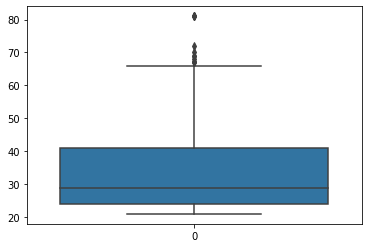

In [42]:
sns.boxplot(data = diabetes['Age'])

# Variable Transformarion

In [44]:
df_norm = diabetes

In [52]:
from sklearn.model_selection import train_test_split

X = df_norm.drop(["Outcome"], axis=1)   #Feature Matrix
y = df_norm["Outcome"]          #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [53]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [54]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
660,10,162.0,84,0,27.7,0.182,54
134,2,96.0,68,13,21.1,0.647,26
731,8,120.0,86,0,28.4,0.259,22
445,0,180.0,78,63,59.4,2.420,25
381,0,105.0,68,22,20.0,0.236,22
...,...,...,...,...,...,...,...
293,1,128.0,48,45,40.5,0.613,24
752,3,108.0,62,24,26.0,0.223,25
543,4,84.0,90,23,39.5,0.159,25
696,3,169.0,74,19,29.9,0.268,31


In [55]:
X_train_norm

array([[0.58823529, 0.76129032, 0.68852459, ..., 0.23058252, 0.04195205,
        0.55      ],
       [0.11764706, 0.33548387, 0.55737705, ..., 0.07038835, 0.24101027,
        0.08333333],
       [0.47058824, 0.49032258, 0.70491803, ..., 0.24757282, 0.07491438,
        0.01666667],
       ...,
       [0.23529412, 0.25806452, 0.73770492, ..., 0.51699029, 0.03210616,
        0.06666667],
       [0.17647059, 0.80645161, 0.60655738, ..., 0.28398058, 0.07876712,
        0.16666667],
       [0.05882353, 0.45806452, 0.57377049, ..., 0.39805825, 0.19049658,
        0.18333333]])

In [56]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X,y,test_size=0.2,random_state=27)


In [57]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,33.6,0.627,81,1
1,1,85.0,66,29,26.6,0.351,31,0
2,8,183.0,64,0,23.3,0.672,32,1
3,1,89.0,66,23,28.1,0.167,21,0
4,0,137.0,40,35,43.1,2.288,33,1


In [58]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# numerical features
num_cols = ['Glucose','BloodPressure','SkinThickness','BMI']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_s[[i]])
    
    # transform the training data column
    X_train_s[i] = scale.transform(X_train_s[[i]])
    
    # transform the testing data column
    X_test_s[i] = scale.transform(X_test_s[[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [59]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
660,10,162.0,84,0,27.7,0.182,54
134,2,96.0,68,13,21.1,0.647,26
731,8,120.0,86,0,28.4,0.259,22
445,0,180.0,78,63,59.4,2.420,25
381,0,105.0,68,22,20.0,0.236,22
...,...,...,...,...,...,...,...
293,1,128.0,48,45,40.5,0.613,24
752,3,108.0,62,24,26.0,0.223,25
543,4,84.0,90,23,39.5,0.159,25
696,3,169.0,74,19,29.9,0.268,31


In [60]:
X_train_s

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
660,10,1.314345,0.770852,-1.292785,-0.701530,0.182,54
134,2,-0.856103,-0.055157,-0.480520,-1.655177,0.647,26
731,8,-0.066849,0.874103,-1.292785,-0.600385,0.259,22
445,0,1.906286,0.461098,2.643574,3.878866,2.420,25
381,0,-0.560133,-0.055157,0.081817,-1.814118,0.236,22
...,...,...,...,...,...,...,...
293,1,0.196235,-1.087667,1.518900,1.147968,0.613,24
752,3,-0.461476,-0.364910,0.206780,-0.947166,0.223,25
543,4,-1.250731,1.080605,0.144299,1.003476,0.159,25
696,3,1.544544,0.254596,-0.105629,-0.383647,0.268,31
